# YouTube Adview Prediction

Objective: Predict adview counts based on YouTube video metrics.

Dataset: Contains metrics like views, likes, dislikes, comments, etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
# importing data
data_train=pd.read_csv("train.csv")

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

In [ ]:
# Assigning each category a number for category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Removing character 'F' present in data
data_train=data_train[data_train.views !='F']
data_train=data_train[data_train.likes !='F']
data_train=data_train[data_train.dislikes !='F']
data_train=data_train[data_train.comment !='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Converting values to integers for views, likes, dislikes, comment and adviews
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [ ]:
column_vidid=data_train['vidid']

In [ ]:
# Encoding features like category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time in sec for duration
import datetime
import time

In [ ]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  P=['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=='H'):
        h=mm
        mm=''
      elif(i=='M'):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
    if(h==''):
      h='00'
    if(m==''):
      m='00'
    if(s==''):
      s='00'
    bp=h+':'+m+':'+s
    return bp

In [ ]:
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time=mp.apply(checki)


In [ ]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
time1=time.apply(func_sec)

In [ ]:
data_train['duration']=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,0,6
1,2741,2,1707,56,2,6,2185,0,4
2,8138,1,2023,25,0,2,2094,0,3
3,9005,6,620860,777,161,153,2119,0,8
4,122,1,666,1,0,0,2091,0,4


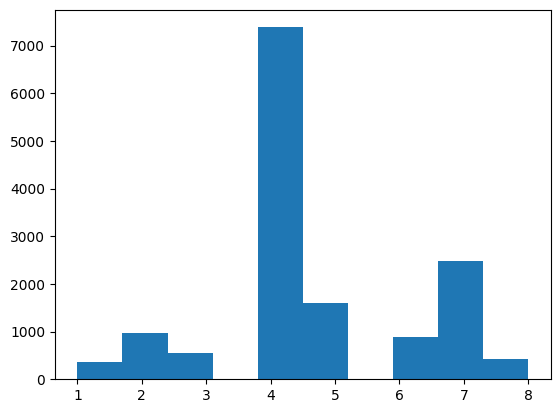

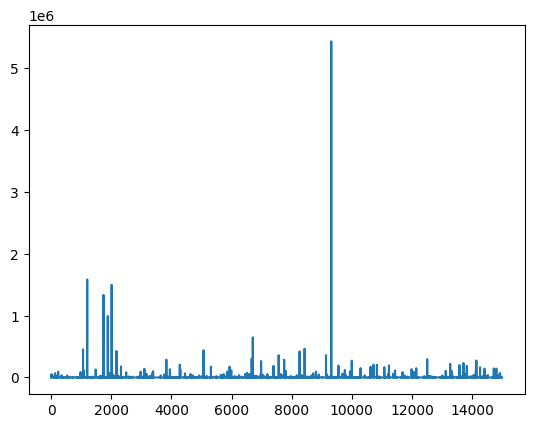

In [ ]:
# Visualization
#Individual plots
plt.hist(data_train['category'])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [ ]:
# Remove videos with adview greater than 2000000 as outliner
data_train=data_train[data_train["adview"]<2000000]

In [ ]:
# Heatmap
import seaborn as sns

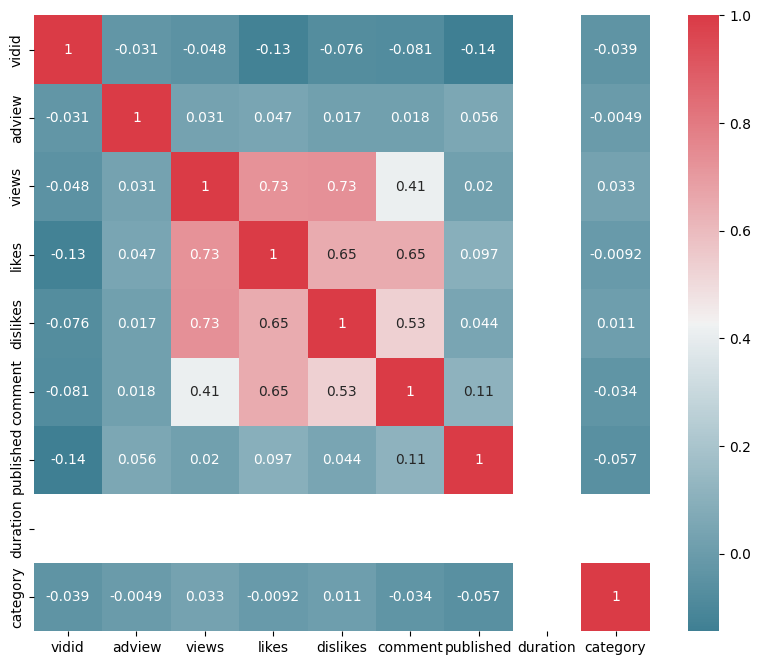

In [ ]:
f,ax= plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
Y_train  = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,0,6
1,1707,56,2,6,2185,0,4
2,2023,25,0,2,2094,0,3
3,620860,777,161,153,2119,0,8
4,666,1,0,0,2091,0,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(11708, 7)

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train.mean()

0.17037138915499772

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
   """
    Print evaluation metrics for the model.

    Parameters:
    - X_test: Input features for testing.
    - y_test: Target variable for testing.
    - model_name: Trained model object.

    Returns:
    - Mean Squared Error (MSE) value.
    """
  prediction = model_name.predict(X_test)
  mae = metrics.mean_absolute_error(y_test, prediction)
  mse = metrics.mean_squared_error(y_test, prediction)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  return mse

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
test_mse_lr = print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 3719.5815634225646
Mean Squared Error: 836136079.6417663
Root Mean Squared Error: 28916.017700260287


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
test_mse_svr = print_error(X_test, y_test, supportvector_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9534032655565
Mean Squared Error: 833686060.8033673
Root Mean Squared Error: 28873.62223212334


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
test_mse_dt = print_error(X_test, y_test, decision_tree)

Mean Absolute Error: 2440.248633879781
Mean Squared Error: 788348937.2547814
Root Mean Squared Error: 28077.552194854547


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
test_mse_rfr = print_error(X_test, y_test, random_forest)

<ipython-input-32-5be7c29a0bb3>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3229.8155965836977
Mean Squared Error: 424996742.54766095
Root Mean Squared Error: 20615.44912311301


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([ Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1) ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
test_mse_ann = print_error(X_test, y_test, ann)

Epoch 1/100
366/366 [==============================] - 5s 7ms/step - loss: 767405312.0000 - mean_squared_error: 767405312.0000
Epoch 2/100
366/366 [==============================] - 2s 5ms/step - loss: 767396224.0000 - mean_squared_error: 767396224.0000
Epoch 3/100
366/366 [==============================] - 2s 4ms/step - loss: 767380096.0000 - mean_squared_error: 767380096.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767346688.0000 - mean_squared_error: 767346688.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767299136.0000 - mean_squared_error: 767299136.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767240960.0000 - mean_squared_error: 767240960.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767165888.0000 - mean_squared_error: 767165888.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767078016.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Store MSE values
mse_values = {
    "Linear Regression": test_mse_lr,
    "Support Vector Regressor": test_mse_svr,
    "Decision Tree": test_mse_dt,
    "Random Forest": test_mse_rfr,
    "Artificial Neural Network": test_mse_ann
}

In [ ]:
# Print MSE values
for model, mse in mse_values.items():
    print(f"{model}: {mse}")

Linear Regression: 836136079.6417663
Support Vector Regressor: 833686060.8033673
Decision Tree: 788348937.2547814
Random Forest: 424996742.54766095
Artificial Neural Network: 829946464.7730608


In [ ]:
# Determine the best model based on MSE
best_model = min(mse_values, key=mse_values.get)
print(f"The best model is {best_model} with an MSE of {mse_values[best_model]}")

The best model is Random Forest with an MSE of 424996742.54766095


In [ ]:
# Save final predictions (using the best model)
if best_model == "Linear Regression":
    final_predictions = linear_regression.predict(X_test)
elif best_model == "Support Vector Regressor":
    final_predictions = supportvector_regressor.predict(X_test)
elif best_model == "Decision Tree":
    final_predictions = decision_tree.predict(X_test)
elif best_model == "Random Forest":
    final_predictions = random_forest.predict(X_test)
else:
    final_predictions = ann.predict(X_test).flatten()

# Conclusion

In this project, we explored various regression models to predict YouTube adview counts. Based on MSE values, the Random Forest Regressor was selected as the best model due to its superior performance in generalization on the test set.
